# **Rate of Penetration Prediction based on Drilling Parameters**

## **Importing Libraries**

In [1]:
#Important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#For saving the model
import pickle

#Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from scipy.stats import zscore

#Model selection and evalution
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

#Models
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

## **Reading the Data**

In [2]:
data = pd.read_csv('tech_challenge2021_train.csv')

In [ ]:
data.head(5)

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
0,USROP_A 0 N-NA_F-9_Ad,491.033,5.842270,9440.922214,0.244047,42.864024,84.0,2784.321942,1.21,311.15,93.780222,490.760309,150.88
1,USROP_A 0 N-NA_F-9_Ad,491.185,6.241431,9499.941336,0.244047,42.315384,84.0,2784.321942,1.21,311.15,93.979803,490.910880,150.88
2,USROP_A 0 N-NA_F-9_Ad,491.222,6.241431,9499.941336,0.244047,42.315384,84.0,2784.321942,1.21,311.15,93.979803,490.910880,150.88
3,USROP_A 0 N-NA_F-9_Ad,491.338,6.368437,9313.024466,0.216931,42.894504,84.0,2784.321942,1.21,311.15,94.079593,491.061756,146.26
4,USROP_A 0 N-NA_F-9_Ad,491.341,6.368437,9313.024466,0.216931,42.894504,84.0,2784.321942,1.21,311.15,94.079593,491.061756,146.26


## **Data Preprocessing and Analysis**

In [ ]:
#Checking data types of diff columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198928 entries, 0 to 198927
Data columns (total 13 columns):
Well Identifier                   198928 non-null object
Measured Depth m                  198928 non-null float64
Weight on Bit kkgf                198928 non-null float64
Average Standpipe Pressure kPa    198928 non-null float64
Average Surface Torque kN.m       198928 non-null float64
Rate of Penetration m/h           198928 non-null float64
Average Rotary Speed rpm          198928 non-null float64
Mud Flow In L/min                 198928 non-null float64
Mud Density In g/cm3              198928 non-null float64
Diameter mm                       198928 non-null float64
Average Hookload kkgf             198928 non-null float64
Hole Depth (TVD) m                198928 non-null float64
USROP Gamma gAPI                  198928 non-null float64
dtypes: float64(12), object(1)
memory usage: 19.7+ MB


In [ ]:
#Checking the statistical data 
data.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000
max,4090.001000,31.411272,24998.459410,36.489128,99.206304,311.230011,4538.450195,12.017384,444.500000,152.926842,3248.389893,260.899000


In [ ]:
#Checking for na values
data.isna().any()

Well Identifier                   False
Measured Depth m                  False
Weight on Bit kkgf                False
Average Standpipe Pressure kPa    False
Average Surface Torque kN.m       False
Rate of Penetration m/h           False
Average Rotary Speed rpm          False
Mud Flow In L/min                 False
Mud Density In g/cm3              False
Diameter mm                       False
Average Hookload kkgf             False
Hole Depth (TVD) m                False
USROP Gamma gAPI                  False
dtype: bool

### Data Visualization

Correlations and Plots

Text(0.5, 1, 'Pearson Correlation Heat Map')

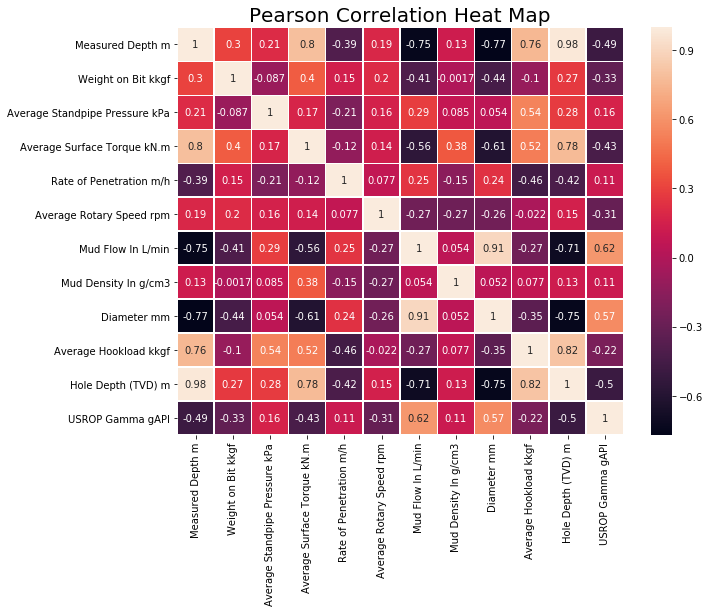

In [ ]:
#Heatmap
plt.figure(figsize = (10,7.5))
plt.grid(axis = 'y', alpha = 0.5)
ax = sns.heatmap(data.corr(method = 'pearson'), annot = True, linewidth = 0.5)
ax.set_title('Pearson Correlation Heat Map', fontsize = 20)

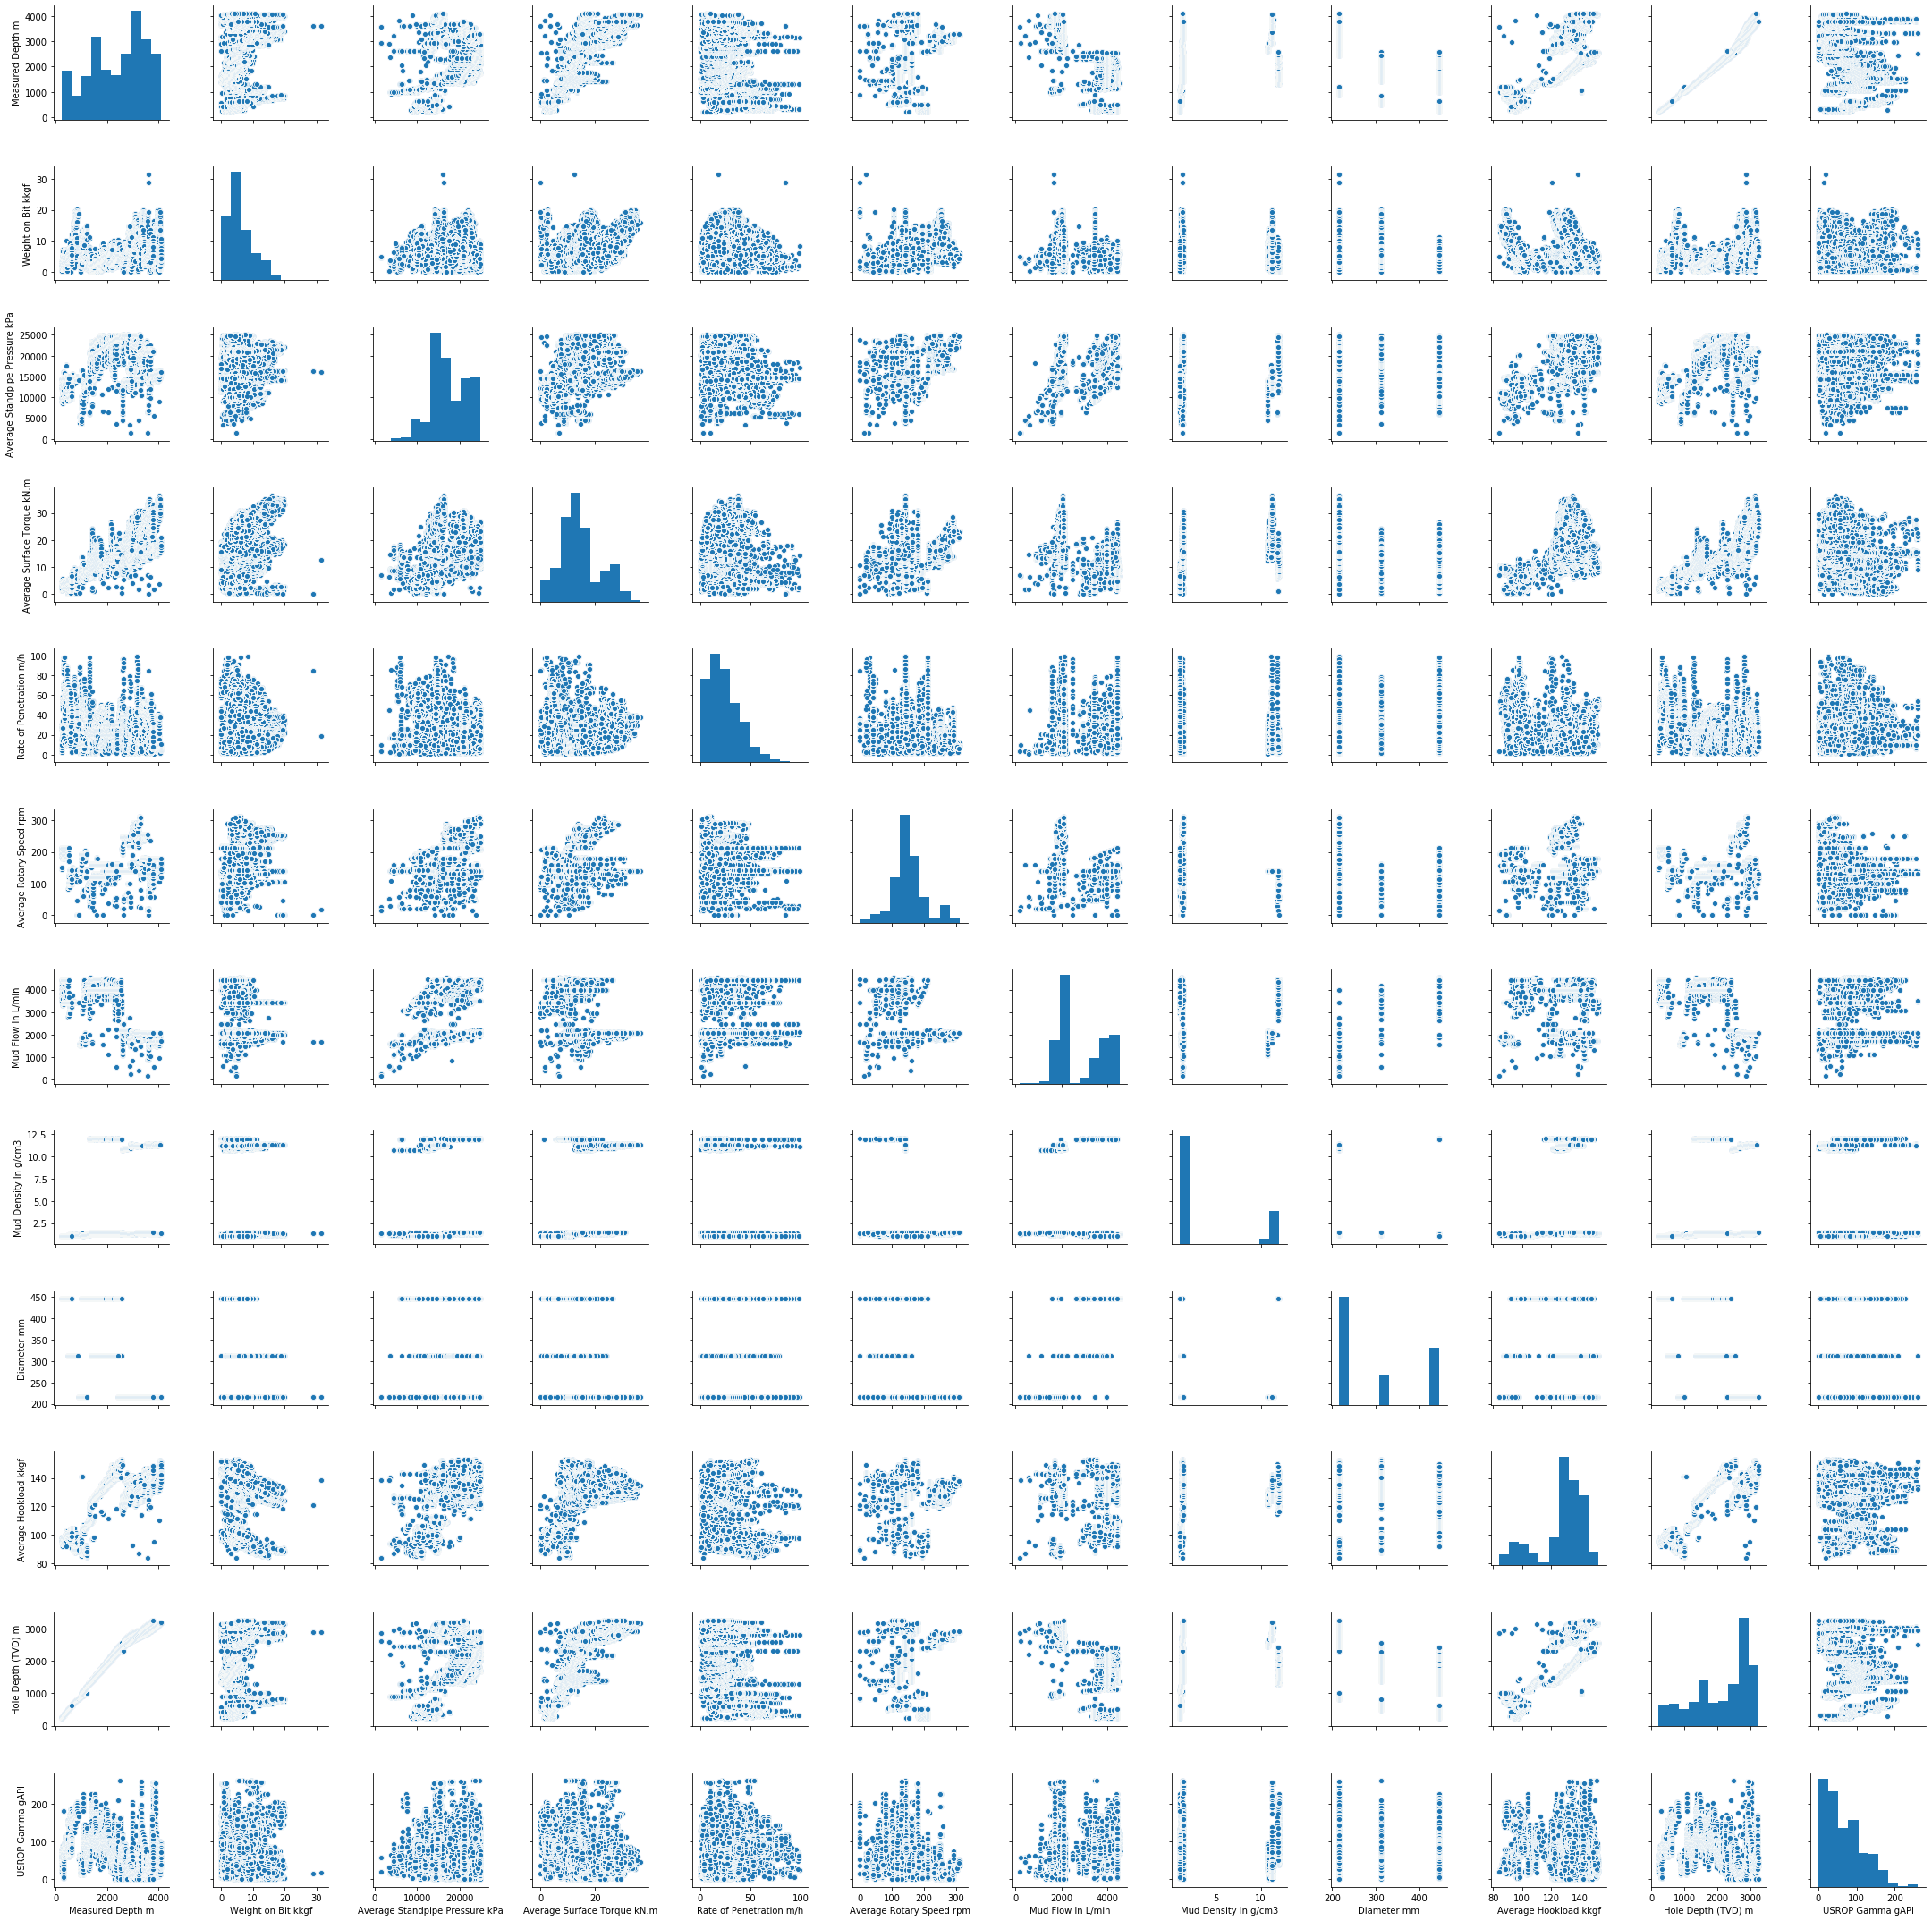

In [ ]:
#Pairplot
sns.pairplot(data)

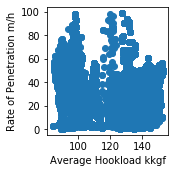

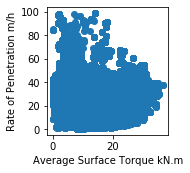

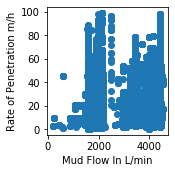

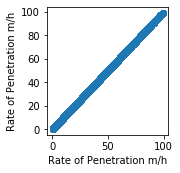

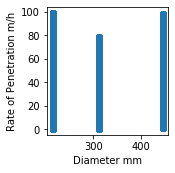

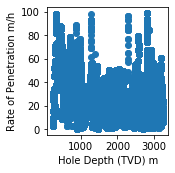

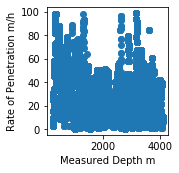

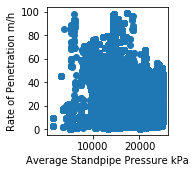

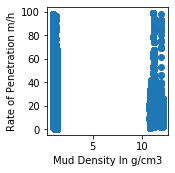

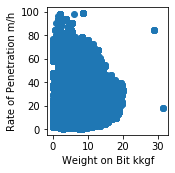

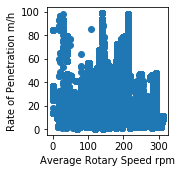

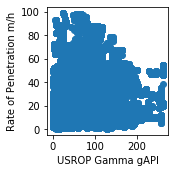

In [ ]:
#Scatterplot
for index, column in enumerate(set(data.columns)-set(['Well Identifier'])):
    plt.figure(figsize=(10,8))
    plt.subplot(3,4,index+1)
    plt.scatter(data[column],data['Rate of Penetration m/h'])
    plt.xlabel(column)
    plt.ylabel('Rate of Penetration m/h')

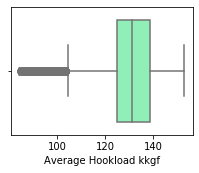

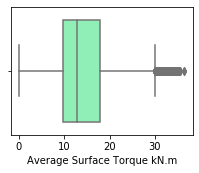

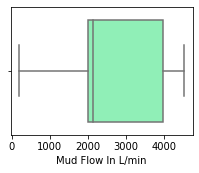

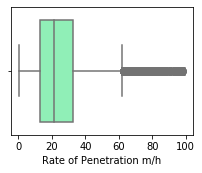

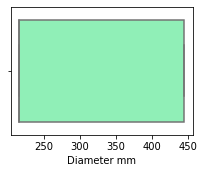

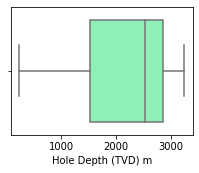

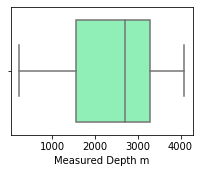

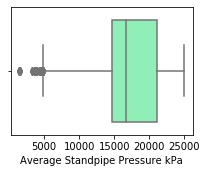

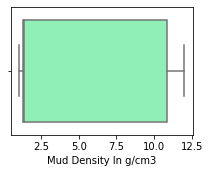

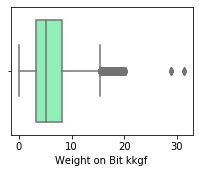

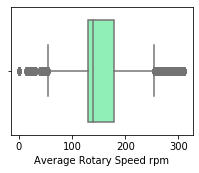

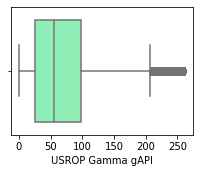

In [ ]:
#Boxplot
for index, column in enumerate(set(data.columns)-set(['Well Identifier'])):
    plt.figure(figsize=(15,8))
    plt.subplot(3,4,index+1)
    sns.boxplot(data[column], palette = 'rainbow')
    plt.xlabel(column)

As seen from the above plots the data contains outliers which need to be removed.

Well Logs

In [ ]:
#Identifying all the wells available in the data
wells = data['Well Identifier'].unique()
print(wells)

['USROP_A 0 N-NA_F-9_Ad' 'USROP_A 1 N-S_F-7d' 'USROP_A 2 N-SH_F-14d'
 'USROP_A 3 N-SH-F-15d' 'USROP_A 4 N-SH_F-15Sd' 'USROP_A 5 N-SH-F-5d'
 'USROP_A 6 N-SH_F-9d']


In [ ]:
#Taking out data for a particular well
well_data = data[data['Well Identifier'] == wells[0]]
print(well_data)

             Well Identifier  Measured Depth m  Weight on Bit kkgf  \
0      USROP_A 0 N-NA_F-9_Ad           491.033            5.842270   
1      USROP_A 0 N-NA_F-9_Ad           491.185            6.241431   
2      USROP_A 0 N-NA_F-9_Ad           491.222            6.241431   
3      USROP_A 0 N-NA_F-9_Ad           491.338            6.368437   
4      USROP_A 0 N-NA_F-9_Ad           491.341            6.368437   
5      USROP_A 0 N-NA_F-9_Ad           491.399            6.368437   
6      USROP_A 0 N-NA_F-9_Ad           491.490            6.336685   
7      USROP_A 0 N-NA_F-9_Ad           491.517            6.336685   
8      USROP_A 0 N-NA_F-9_Ad           491.642            5.914845   
9      USROP_A 0 N-NA_F-9_Ad           491.694            5.914845   
10     USROP_A 0 N-NA_F-9_Ad           491.795            6.173392   
11     USROP_A 0 N-NA_F-9_Ad           491.871            6.173392   
12     USROP_A 0 N-NA_F-9_Ad           491.929            6.173392   
13     USROP_A 0 N-N

In [ ]:
set(well_data.columns)

{'Average Hookload kkgf',
 'Average Rotary Speed rpm',
 'Average Standpipe Pressure kPa',
 'Average Surface Torque kN.m',
 'Diameter mm',
 'Hole Depth (TVD) m',
 'Measured Depth m',
 'Mud Density In g/cm3',
 'Mud Flow In L/min',
 'Rate of Penetration m/h',
 'USROP Gamma gAPI',
 'Weight on Bit kkgf',
 'Well Identifier'}

In [ ]:
set(well_data.columns)-set(['Well Identifier'])

{'Average Hookload kkgf',
 'Average Rotary Speed rpm',
 'Average Standpipe Pressure kPa',
 'Average Surface Torque kN.m',
 'Diameter mm',
 'Hole Depth (TVD) m',
 'Measured Depth m',
 'Mud Density In g/cm3',
 'Mud Flow In L/min',
 'Rate of Penetration m/h',
 'USROP Gamma gAPI',
 'Weight on Bit kkgf'}

(1205.999, 491.033)

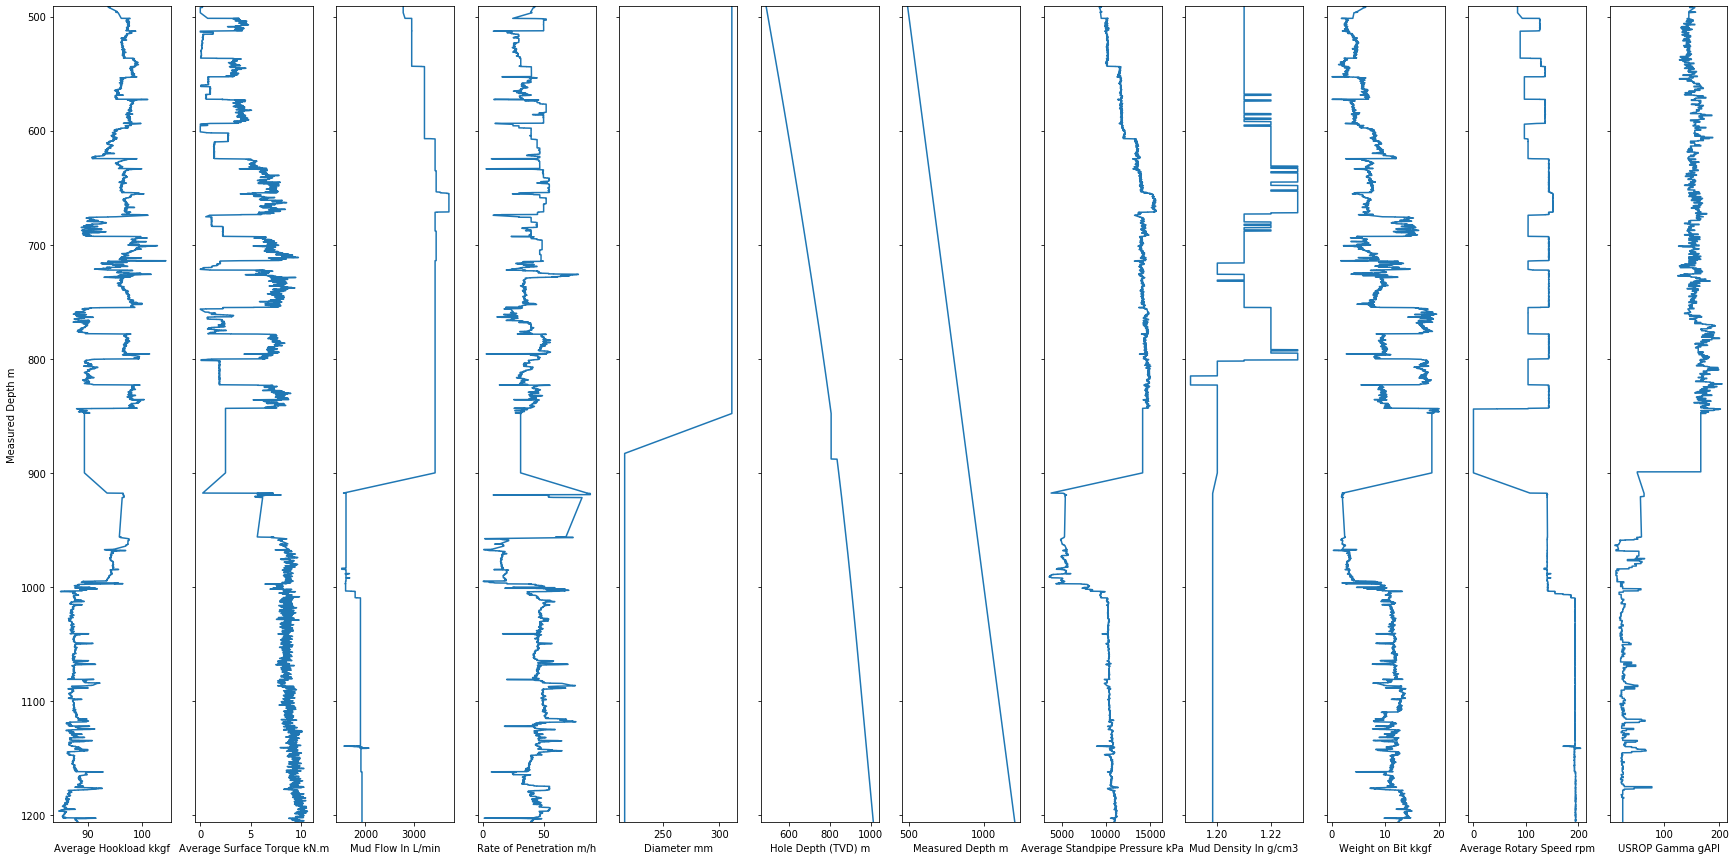

In [ ]:
fig, ax = plt.subplots(1, len(well_data.columns)-1, figsize = (30,15), sharey = True)
for index, column in enumerate(set(well_data.columns)-set(['Well Identifier'])):
    ax[index].plot(well_data[column],well_data['Measured Depth m'])
    ax[index].set_xlabel(column)
ax[0].set_ylabel('Measured Depth m')
ax[0].set_ylim(well_data['Measured Depth m'].values[-1],well_data['Measured Depth m'].values[0])

(633.536, 301.231)

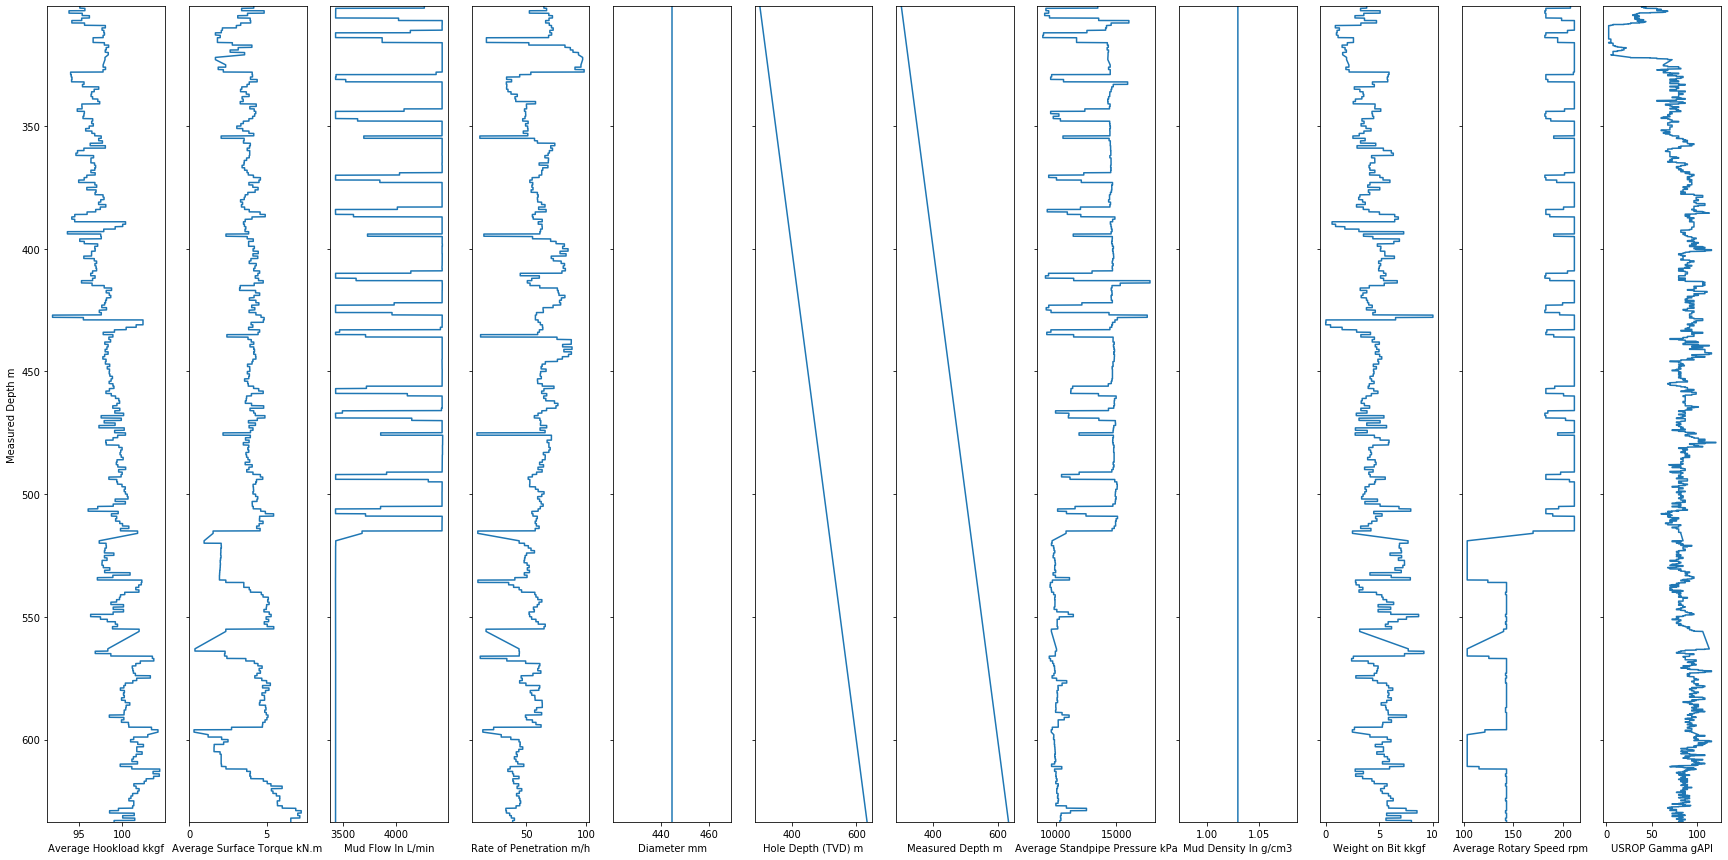

In [ ]:
well_data = data[data['Well Identifier'] == wells[1]]
fig, ax = plt.subplots(1,len(well_data.columns)-1,figsize=(30,15),sharey=True)
for index, column in enumerate(set(well_data.columns)-set(['Well Identifier'])):
    ax[index].plot(well_data[column],well_data['Measured Depth m'])
    ax[index].set_xlabel(column)
ax[0].set_ylabel('Measured Depth m')
ax[0].set_ylim(well_data['Measured Depth m'].values[-1],well_data['Measured Depth m'].values[0])

### Detecting and Removing Outliers

In [3]:
data=data.drop(columns=['Well Identifier'])

In [ ]:
data.columns

Index(['Measured Depth m', 'Weight on Bit kkgf',
       'Average Standpipe Pressure kPa', 'Average Surface Torque kN.m',
       'Rate of Penetration m/h', 'Average Rotary Speed rpm',
       'Mud Flow In L/min', 'Mud Density In g/cm3', 'Diameter mm',
       'Average Hookload kkgf', 'Hole Depth (TVD) m', 'USROP Gamma gAPI'],
      dtype='object')

In [ ]:
pd.DataFrame(np.abs(zscore(data)))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.801083,0.062098,1.890792,1.959538,1.185521,1.367395,0.084569,0.622356,0.136324,2.168455,1.964360,1.656422
1,1.800941,0.038774,1.876861,1.959538,1.149156,1.367395,0.084569,0.622356,0.136324,2.155622,1.964182,1.656422
2,1.800906,0.038774,1.876861,1.959538,1.149156,1.367395,0.084569,0.622356,0.136324,2.155622,1.964182,1.656422
3,1.800797,0.070870,1.920982,1.963284,1.187542,1.367395,0.084569,0.622356,0.136324,2.149205,1.964004,1.564973
4,1.800794,0.070870,1.920982,1.963284,1.187542,1.367395,0.084569,0.622356,0.136324,2.149205,1.964004,1.564973
5,1.800740,0.070870,1.920982,1.963284,1.187542,1.367395,0.084569,0.622356,0.136324,2.149205,1.964004,1.564973
6,1.800655,0.062846,1.935254,1.961411,1.172793,1.367395,0.084569,0.622356,0.136324,2.171663,1.963826,1.564973
7,1.800629,0.062846,1.935254,1.961411,1.172793,1.367395,0.084569,0.622356,0.136324,2.171663,1.963826,1.564973
8,1.800512,0.043757,1.891573,1.961411,1.137438,1.367395,0.084569,0.622356,0.136324,2.161746,1.963648,1.564973
9,1.800463,0.043757,1.891573,1.961411,1.137438,1.367395,0.084569,0.622356,0.136324,2.161746,1.963648,1.564973


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


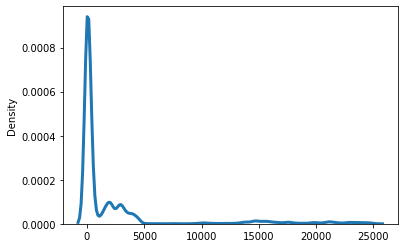

In [ ]:
sns.distplot(data, hist = False, kde = True, kde_kws = {'linewidth': 3})

In [ ]:
#Data with Z score less than 3
(np.abs(zscore(data)) < 3).all(axis=1).sum()

193587

In [4]:
#Removing outliers
data=data[(np.abs(zscore(data)) < 3).all(axis=1)]

### Shuffling the Data

In [5]:
X = data.drop(['Rate of Penetration m/h'],axis=1)
Y = data['Rate of Penetration m/h']
X, Y = shuffle(X, Y, random_state=42)

### Feature Scaling

In [6]:
sclr = StandardScaler()
X = sclr.fit_transform(X)

### Splitting the Data

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

## **Model Training**

### Linear Regression 

In [ ]:
LR_model = LinearRegression()
LR_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred_LR = LR_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test,Y_pred_LR)
err_LR = 'MAE: ' + str(round(mae,5))
print('Linear Regression Model Performance:-- ',err_LR)

Linear Regression Model Performance:--  MAE: 8.36488


In [ ]:
r2_score(Y_test,Y_pred_LR)

0.40165423730779326

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(50.0, 0.0, 'MAE: 8.36488')

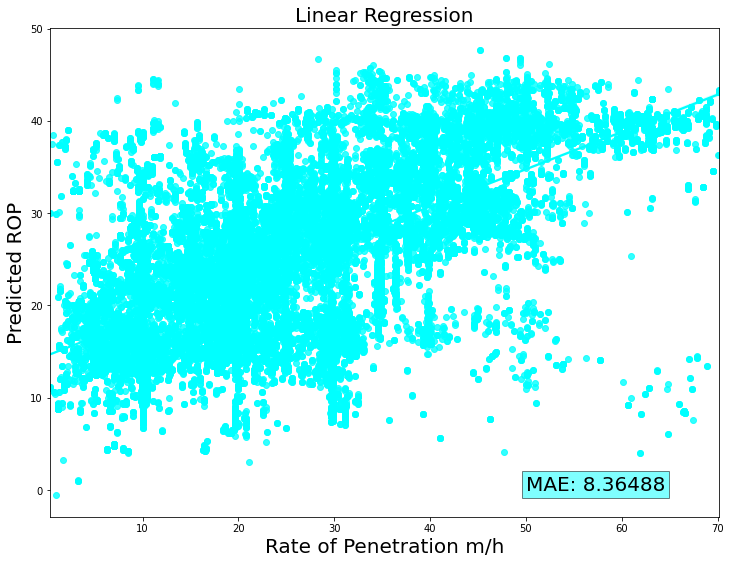

In [ ]:
plt.figure(figsize = (12,9))
ax = sns.regplot(Y_test, Y_pred_LR, marker = 'o', color = 'cyan')
ax.set_title('Linear Regression', fontsize = 20)
ax.set_xlabel('Rate of Penetration m/h', fontsize = 20)
ax.set_ylabel('Predicted ROP', fontsize = 20)
plt.text(50.0, 0.0, err_LR, fontsize=20, bbox=dict(facecolor='cyan', alpha=0.5))

### K-Nearest Neighbour Regression 

In [ ]:
KNR_model = KNeighborsRegressor(n_neighbors = 1)
KNR_model.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [ ]:
Y_pred_KNR = KNR_model.predict(X_test) 

In [ ]:
mae = mean_absolute_error(Y_test,Y_pred_KNR)
err_KNR = 'MAE: ' + str(round(mae,8))
print('KNN Regression Model Performance:-- ',err_KNR)

KNN Regression Model Performance:--  MAE: 0.0705301


In [ ]:
r2_score(Y_test,Y_pred_KNR)

0.9959410250781192

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(50.0, 10.0, 'MAE: 0.0705301')

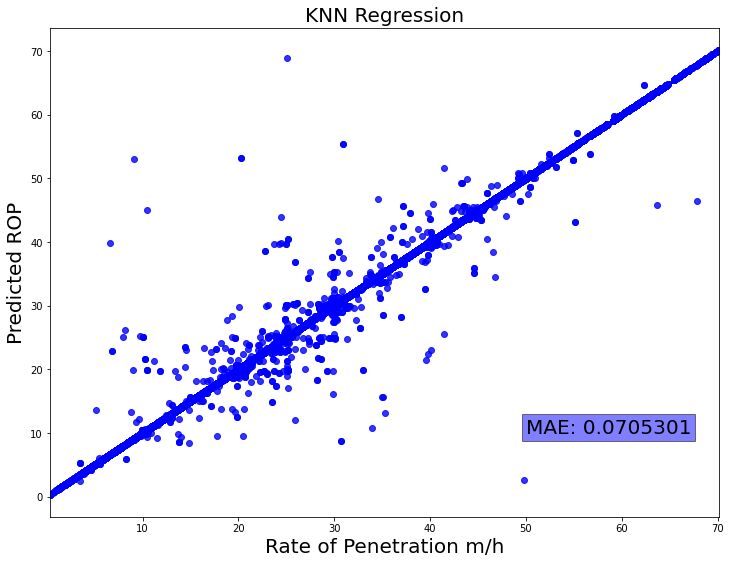

In [ ]:
plt.figure(figsize = (12,9))
ax = sns.regplot(Y_test, Y_pred_KNR, marker = 'o', color = 'blue')
ax.set_title('KNN Regression', fontsize = 20)
ax.set_xlabel('Rate of Penetration m/h', fontsize = 20)
ax.set_ylabel('Predicted ROP', fontsize = 20)
plt.text(50.0, 10.0, err_KNR, fontsize=20, bbox=dict(facecolor='blue', alpha=0.5))

### Random Forest Regressor 

In [ ]:
RF_model = RandomForestRegressor(n_estimators=150, random_state=0)
RF_model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [ ]:
Y_pred_RF = RF_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test,Y_pred_RF)
err_RF = 'MAE: ' + str(round(mae,8))
print('Random Forest Tree Regression Model Performance:-- ',err_RF)

Random Forest Tree Regression Model Performance:--  MAE: 0.10366608


In [ ]:
r2_score(Y_test, Y_pred_RF)

0.9976578969658256

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(50.0, 10.0, 'MAE: 0.10367')

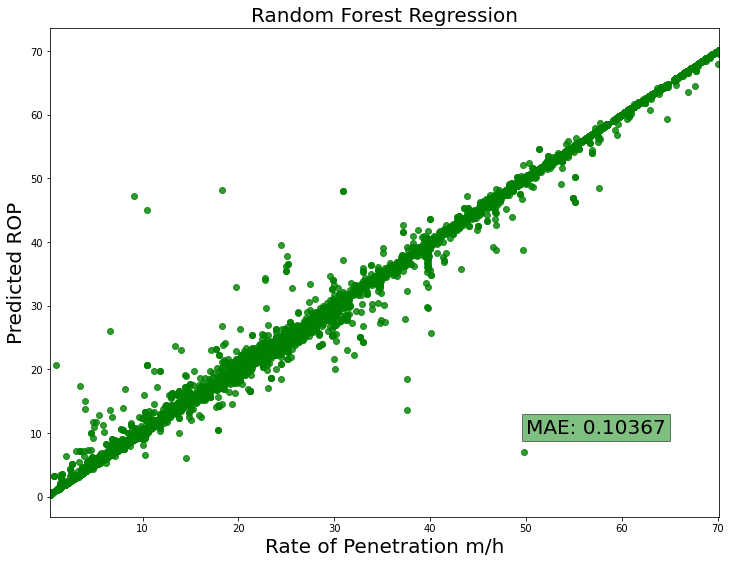

In [ ]:
plt.figure(figsize = (12,9))
ax = sns.regplot(Y_test, Y_pred_RF, marker = 'o', color = 'green')
ax.set_title('Random Forest Regression', fontsize = 20)
ax.set_xlabel('Rate of Penetration m/h', fontsize = 20)
ax.set_ylabel('Predicted ROP', fontsize = 20)
plt.text(50.0, 10.0, err_RF, fontsize=20, bbox=dict(facecolor='green', alpha=0.5))

### Gradient Boosting Regressor 

In [ ]:
GBR_model = GradientBoostingRegressor()
GBR_model.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
Y_pred_GBR = GBR_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test,Y_pred_GBR)
err_GBR = 'MAE: ' + str(round(mae,8))
print('Gradient Boost Regression Model Performance:-- ',err_GBR)

Gradient Boost Regression Model Performance:--  MAE: 4.51457367


In [ ]:
r2_score(Y_test,Y_pred_GBR)

0.8082070999055482

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(50.0, 5.0, 'MAE: 4.51457367')

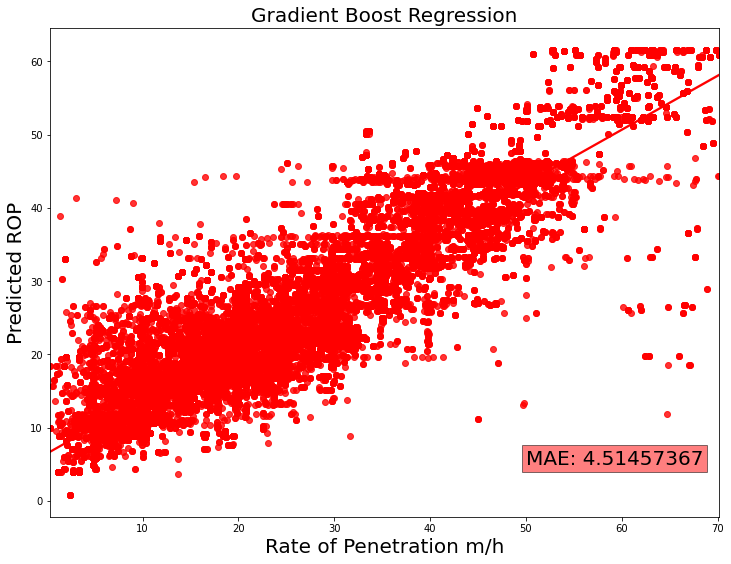

In [ ]:
plt.figure(figsize = (12,9))
ax = sns.regplot(Y_test, Y_pred_GBR, marker = 'o', color = 'red')
ax.set_title('Gradient Boost Regression', fontsize = 20)
ax.set_xlabel('Rate of Penetration m/h', fontsize = 20)
ax.set_ylabel('Predicted ROP', fontsize = 20)
plt.text(50.0, 5.0, err_GBR, fontsize=20, bbox=dict(facecolor='red', alpha=0.5))

### XG Boost Regressor

In [ ]:
XGB_model = XGBRegressor()
XGB_model.fit(X_train,Y_train)

[15:05:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
Y_pred_XGB = XGB_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test,Y_pred_XGB)
err_XGB = 'MAE: ' + str(round(mae,8))
print('XG Boost Regression Model Performance:-- ',err_XGB)

XG Boost Regression Model Performance:--  MAE: 4.47081182


In [ ]:
r2_score(Y_test,Y_pred_XGB)

0.8108406195144311

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(50.0, 5.0, 'MAE: 4.47081182')

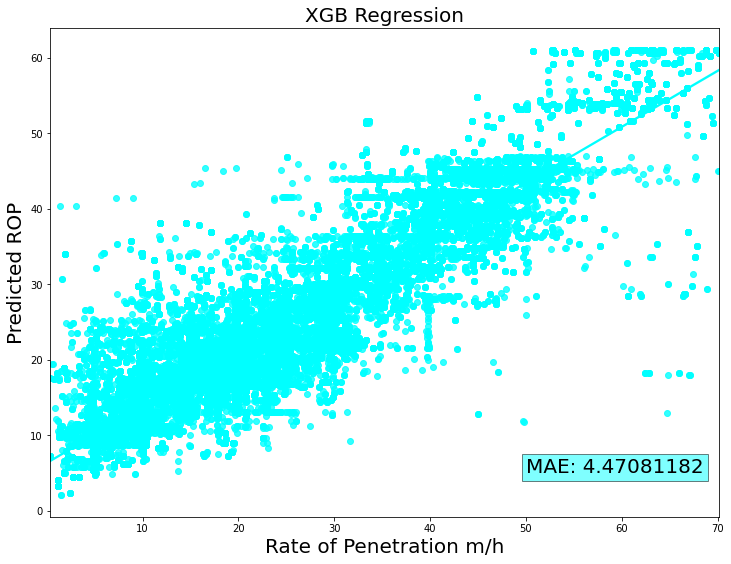

In [ ]:
plt.figure(figsize = (12,9))
ax = sns.regplot(Y_test, Y_pred_XGB, marker = 'o', color = 'cyan')
ax.set_title('XGB Regression', fontsize = 20)
ax.set_xlabel('Rate of Penetration m/h', fontsize = 20)
ax.set_ylabel('Predicted ROP', fontsize = 20)
plt.text(50.0, 5.0, err_XGB, fontsize=20, bbox=dict(facecolor='cyan', alpha=0.5))

### Random Forest Regression model is clearly giving us the least mean absolute error, but to be sure that our model is not overfitting we shall perform KFold Cross Validation on our different models and find out the best one.

## **Model Selection**

In [ ]:
regressors = [LR_model, RF_model, KNR_model, GBR_model, XGB_model]
kfolds = 10

for regressor in regressors :
    cv_results = (cross_val_score(regressor, X, Y, cv = KFold(kfolds)))
    if regressor == RF_model :
        print("Random Forest Regression, Mean_Accuracy: ", round(cv_results.mean(), 8))
    elif regressor == LR_model:
        print("Linear Regression, Mean_Accuracy: ", round(cv_results.mean(), 8))
    elif regressor == KNR_model:
        print("KNN Regression, Mean_Accuracy: ", round(cv_results.mean(), 8))
    elif regressor == GBR_model:
        print("Gradient Boost Regression, Mean_Accuracy: ", round(cv_results.mean(), 8))
    else:
        print("XG Boost Regression, Mean_Accuracy: ", round(cv_results.mean(), 8))            

Linear Regression, Mean_Accuracy:  0.40490352
Random Forest Regression, Mean_Accuracy:  0.99796852
KNN Regression, Mean_Accuracy:  0.99733832
Gradient Boost Regression, Mean_Accuracy:  0.80902073
[18:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:20:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:22:01] WARNING: /workspace/src/objecti

## **Hyperparameter Optimization**

In [ ]:
param_grid = {
    'max_depth': [100, 125, 150],
    'max_features': [2, 3],
    'min_samples_split': [2, 3, 5],
    'n_estimators': [100, 180, 260]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 44.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [100, 125, 150], 'ma

In [ ]:
grid_search.best_params_

{'max_depth': 125,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 260}

In [8]:
RF_best_model = RandomForestRegressor(max_depth=125,n_estimators=260, min_samples_split=2, max_features=3, random_state=0)
RF_best_model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=125, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=260, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [9]:
Y_pred_RF = RF_best_model.predict(X_test)

In [10]:
mae = mean_absolute_error(Y_test,Y_pred_RF)
err_RF = 'MAE: ' + str(round(mae,8))
print('Random Forest Tree Regression Model Performance:-- ',err_RF)

Random Forest Tree Regression Model Performance:--  MAE: 0.09722277


In [11]:
r2_score(Y_test,Y_pred_RF)

0.9986643981257016

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(50.0, 10.0, 'MAE: 0.09722277')

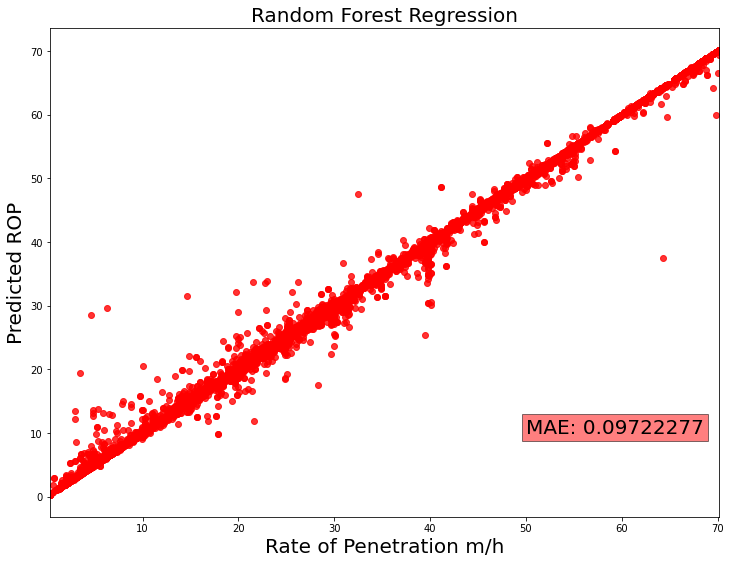

In [12]:
plt.figure(figsize = (12,9))
ax = sns.regplot(Y_test, Y_pred_RF, marker = 'o', color = 'red')
ax.set_title('Random Forest Regression', fontsize = 20)
ax.set_xlabel('Rate of Penetration m/h', fontsize = 20)
ax.set_ylabel('Predicted ROP', fontsize = 20)
plt.text(50.0, 10.0, err_RF, fontsize=20, bbox=dict(facecolor='red', alpha=0.5))

## **Saving Model and Scaler Files**

In [13]:
pickle.dump(RF_best_model, open('model.pkl', 'wb'))

In [15]:
pickle.dump(sclr, open('scaler.pkl', 'wb'))

In [14]:
class Model(object):
    def __init__(self, model_file, scaler_file):
        # Load pre-trained model from file
        self.model = pickle.load(open(model_file, 'rb'))
        # Load a "pre-trained" scaler from file
        self.scaler = pickle.load(open(scaler_file, 'rb'))
        
    def _preprocess(self, features):
        # Method to be run before inference. Contains things like
        # stripping unwanted columns, replacing NaNs, and scaling 
        # or normalizing data
        features.fillna(0, inplace=True)
        features = features[['Measured Depth m','Weight on Bit kkgf','Average Standpipe Pressure kPa',
                             'Average Surface Torque kN.m','Average Rotary Speed rpm','Mud Flow In L/min',
                             'Mud Density In g/cm3','Diameter mm','Average Hookload kkgf','Hole Depth (TVD) m',
                             'USROP Gamma gAPI']]
        return self.scaler.transform(features)
        
    def predict(self, features):
        # This function should be able to take in features in their
        # raw, unprocessed form as read from the file test.csv and
        # return predictions as an array integers of the same length
        X = self._preprocess(features)
        return self.model.predict(X)

In [ ]:
model = Model('model.pkl', 'scaler.pkl')

## **Testset Predictions**

### Reading the Testset 

In [16]:
testset = pd.read_csv('tech_challenge2021_test.csv')

In [17]:
testset.drop(['Well Identifier'],axis=1, inplace=True)

### Feature Scaling

In [18]:
testset = sclr.fit_transform(testset)

### ROP Prediction

In [19]:
testset_pred = RF_best_model.predict(testset)
testset_pred

array([26.9323103 , 26.9323103 , 26.9323103 , ..., 16.82280403,
       16.82280403, 16.82280403])

### Saving the Predictions

In [ ]:
np.savetxt('test_predictions 3 28-04-2021.csv', testset_pred, header='Rate of Penetration', comments='', fmt='%f')

## **Saving the Requirements**

In [20]:
!pip freeze > requirements.txt